In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [3]:
# Residual diagnostics
#----------------------------------------------------------------------------------------------------------------------
# Source: https://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.mlemodel.MLEResults.plot_diagnostics.html
def plot_diagnostics(self, variable=0, lags=40, fig=None, figsize=(15,7)):
  from statsmodels.graphics.utils import _import_mpl, create_mpl_fig
  _import_mpl()
  fig = create_mpl_fig(fig, figsize)

  # # Eliminate residuals associated with burned or diffuse likelihoods
  # d = np.maximum(self.loglikelihood_burn, self.nobs_diffuse)
  # resid = self.filter_results.standardized_forecasts_error[variable, d:]
  # loglikelihood_burn: the number of observations during which the likelihood is not evaluated.

  # Standardize residual
  # Source: https://alkaline-ml.com/pmdarima/1.1.1/_modules/pmdarima/arima/arima.html
  resid = self
  resid = (resid - np.nanmean(resid)) / np.nanstd(resid)

  # Top-left: residuals vs time
  ax = fig.add_subplot(221)
  if hasattr(self.data, 'dates') and self.data.dates is not None:
      x = self.data.dates[d:]._mpl_repr()
  else:
      x = np.arange(len(resid))
  ax.plot(x, resid)
  ax.hlines(0, x[0], x[-1], alpha=0.5)
  ax.set_xlim(x[0], x[-1])
  ax.set_title('Standardized residual')

  # Top-right: histogram, Gaussian kernel density, Normal density
  # Can only do histogram and Gaussian kernel density on the non-null
  # elements
  resid_nonmissing = resid[~(np.isnan(resid))]
  ax = fig.add_subplot(222)

  # gh5792: Remove  except after support for matplotlib>2.1 required
  try:
      ax.hist(resid_nonmissing, density=True, label='Hist')
  except AttributeError:
      ax.hist(resid_nonmissing, normed=True, label='Hist')

  from scipy.stats import gaussian_kde, norm
  kde = gaussian_kde(resid_nonmissing)
  xlim = (-1.96*2, 1.96*2)
  x = np.linspace(xlim[0], xlim[1])
  ax.plot(x, kde(x), label='KDE')
  ax.plot(x, norm.pdf(x), label='N(0,1)')
  ax.set_xlim(xlim)
  ax.legend()
  ax.set_title('Histogram plus estimated density')

  # Bottom-left: QQ plot
  ax = fig.add_subplot(223)
  from statsmodels.graphics.gofplots import qqplot
  qqplot(resid_nonmissing, line='s', ax=ax)
  ax.set_title('Normal Q-Q')

  # Bottom-right: Correlogram
  ax = fig.add_subplot(224)
  from statsmodels.graphics.tsaplots import plot_pacf
  plot_pacf(resid, ax=ax, lags=lags)
  ax.set_title('Partial Autocorrelation function')
 
  ax.set_ylim(-0.1, 0.1)

  return fig

In [39]:
windows_y.shape

(19, 16, 8)

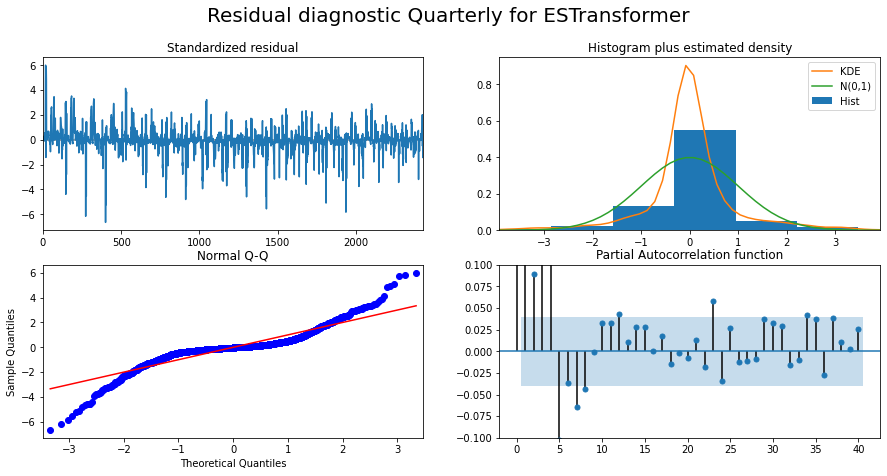

In [11]:
import numpy as np
import matplotlib.pyplot as plt


windows_y_hat = np.load('/content/gdrive/My Drive/Colab Notebooks/hybcast_epoch/windows_y_hat_quarterly.npy')
windows_y = np.load('/content/gdrive/My Drive/Colab Notebooks/hybcast_epoch/windows_y_quarterly.npy')

final_y_hat = []
final_y = []

# for id_num in range(windows_y.shape[1]):
#   final_y_hat = []
#   for i in range(len(windows_y_hat)):
#     final_y_hat[i:i+len(windows_y_hat[i][id_num])] = windows_y_hat[i][id_num]

#   final
#   for i in range(len(windows_y)):
#     final_y[i:i+len(windows_y[i][id_num])] = windows_y[i][id_num]

# for id_num in range(windows_y.shape[1]):
#   final_y_hat = []
#   for i in range(len(windows_y_hat)):
#     final_y_hat.append(windows_y_hat[i][id_num])

#   final_y = []
#   for i in range(len(windows_y)):
#     final_y.append(windows_y[i][id_num])
  
#   resid = np.array(final_y_hat).flatten() - np.array(final_y).flatten()
#   diag_series = plot_diagnostics(resid)
#   plt.show()

final_y_hat = windows_y_hat.flatten()
final_y = windows_y.flatten()



resid = np.array(final_y_hat) - np.array(final_y)
# resid = np.asmatrix(resid)
  # resid = np.sqrt((np.array(windows_y_hat[id_num]) - np.array(windows_y[id_num]))**2)
diag_series = plot_diagnostics(resid)
plt.suptitle('Residual diagnostic Quarterly for ESTransformer', fontsize = 20)
plt.savefig('/content/gdrive/My Drive/Colab Notebooks/hybcast_epoch/ESTransformer/resid_diag_quarterly_1ep.png', bbox_inches='tight', dpi=500)
plt.show()

In [33]:
import numpy as np

numb = np.array([[1, 2], [5,6]])
numb2 = np.array([3, 4])
m = []
m.append(numb)
m.append(numb2)
m = np.matrix(m)

/usr/local/lib/python3.7/dist-packages/numpy/matrixlib/defmatrix.py:145: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr = N.array(data, dtype=dtype, copy=copy)


ValueError: ignored

In [31]:
type(m)

list

In [30]:
from copy import deepcopy
temp = deepcopy(m)
list(temp)

[array([[1, 2],
        [5, 6]]), array([3, 4])]

In [45]:
import numpy as np

windows_y_hat = np.load('/content/gdrive/My Drive/Colab Notebooks/hybcast_epoch/windows_y_hat_quarterly.npy')
windows_y = np.load('/content/gdrive/My Drive/Colab Notebooks/hybcast_epoch/windows_y_quarterly.npy')

# for id_num in range(len(windows))
id_num = 0
final_y_hat = []
for i in range(len(windows_y_hat)):
  final_y_hat.append(windows_y_hat[i][id_num])

final_y = []
for i in range(len(windows_y)):
  final_y.append(windows_y[i][id_num])

resid = np.array(final_y_hat).flatten() - np.array(final_y).flatten()
# resid = np.asmatrix(resid)
  # resid = np.sqrt((np.array(windows_y_hat[id_num]) - np.array(windows_y[id_num]))**2)
diag_series = plot_diagnostics(resid)
plt.show()

array([6155.838 , 6559.966 , 6083.922 , 6290.5957, 6421.323 , 6667.7373,
       6293.7954, 6377.98  ], dtype=float32)

In [43]:
for id_num in range(len(windows_y_hat)):
  print(id_num)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


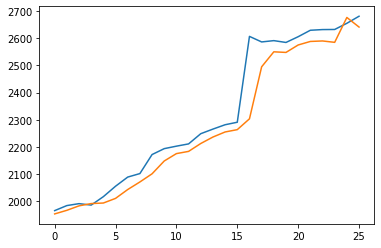

In [25]:
import matplotlib.pyplot as plt

plt.plot(final_y)
plt.plot(final_y_hat)

In [42]:
sum(resid)

-4178.89990234375